# Modelo Preditivo de Doenças Cardiovasculares

Este notebook tem como objetivo principal utilizar técnicas de Ciência de Dados e Machine Learning para elaborar um modelo preditivo de classificação binária para a presença de doenças cardíovasculares, baseado no prontuário médico de um paciente.

O dataset utilizado neste modelo pode ser obtido no repositório [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/heart+disease) e também no Kaggle. A motivação para a escolha do dataset deve-se ao fato deste ser fácil de trabalhar, pois não contém dados faltantes e também o conjunto de dados estão relativamente balanceados.

Vamos importar as principais bibliotecas do Python para análise de dados e então carregar nossos dados:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('datasets/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dicionário de Dados

Um dicionário de dados é a descrição das variáveis presentes em nosso dataset. O presente dataset possui as seguintes variáveis:

- **age** - Idade do paciente (em anos)
- **sex** - Sexo biológico do paciente (1 = Masculino, 0 = Feminino)
- **cp** - Tipo de dor no peito (0 = Típica angina, 1 = Atípica angina, 2 = Dor não anginal, 3 = Assintomática)
- **trestbps** - Pressão arterial em repouso (em mm Hg)
- **chol** - Colesterol sérico (em mg/dL)
- **fbs** - Glicose sanguínea em jejum maior que 120mg/dL (1 = Verdadeiro, 0 = Falso)
- **restecg** - Resultado do eletrocardiograma de repouso (0 = Normal, 1 = Anormalidade de ST-T, 2 = Hipertrofia ventricular esquerda provável ou definitiva)
- **thalach** - Frequência cardíaca máxima alcançada
- **exang** - Angina induzida por exercício (1 = Sim, 0 = Não)
- **oldpeak** - Depressão do segmento ST induzida pelo exercício em relação ao repouso
- **slope** - Inclinação do segmento ST de pico do exercício (0 = Crescente, 1 = Constante, 2 = Decrescente)
- **ca** - Número de vasos coloridos fluorescentes (0-3) detectados pelo fluoroscópio
- **thal** - Tipo de defecto do coração (3 = Normal, 6 = Problema fixo, 7 = Problema reversível)
- **target** - Diagnóstico do paciente (1 = Possui doença(s), 0 = Não possui)

# Análise Exploratória de Dados

A partir da Análise Exploratória de Dados, temos como objetivo elaborar questionamentos e respondê-los a fim de obter maior compreensão dos nossos dadaos. Existem vários questionamentos que poderiam ser feitos, entre eles podemos incluir:

- Qual a proporção de dados ausentes, nulos e outliers e como tratá-los?
- Qual a Distribuição de Frequência das variáveis qualitativas dos nossos dados?
- O que as Medidas de Tendência Central nos revelam sobre as variáveis quantitativas dos nossos dados?
- Que insights podemos obter a respeito dos nossos dados?

No momento em que essas perguntas forem respondidas, compreendemos melhor nossos dados, extraímos informações relevantes a respeito deles e assim implementamos modelos mais precisos e coerentes com nosso objetivo.

Primeiro, vamos visualizar a quantidade de dados ausentes ou nulos, a partir do comando abaixo:

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

O resultado acima nos diz que não há dados ausentes ou nulos em nosso conjunto de dados, facilitando nosso trabalho de limpeza de dados. Vamos analisar mais detalhadamente algumas dessas variáveis.

## Analisando a variável diagnóstico

Vamos analisar a variável *target*. Abaixo foram feitas tabela de frequência e gráfico de barras a respeito dessa variável, com eles podemos concluir que há maior proeminência de pacientes com diagnóstico de doença(s) cardiovascular(es), representando cerca de 54% da amostra. A respeito do gráfico, a quantidade de pacientes está em função da variável *target*, no qual 1 indica preseça de doença(s) enquanto 0 indica a ausência.

In [6]:
freq_abs = df['target'].value_counts()
freq_rel = df['target'].value_counts(normalize=True)

freq_tab = {'Freq. Abs.': freq_abs, 'Freq. Rel. (%)': round(freq_rel * 100, 2)}
pd.DataFrame(freq_tab).rename(index={1: 'Possui', 0: 'Não possui'})

,Freq. Abs.,Freq. Rel. (%)
Possui,165,54.46
Não possui,138,45.54


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

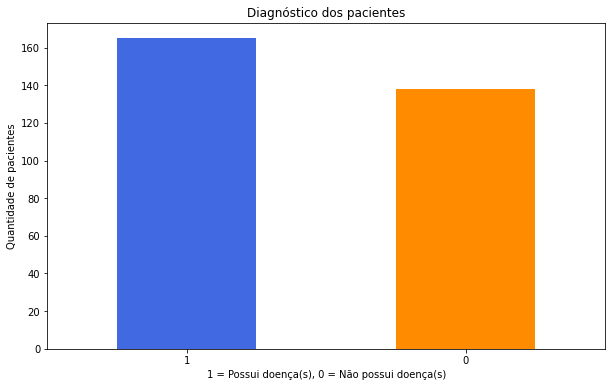

In [8]:
df['target'].value_counts().plot(kind='bar', color=['royalblue', 'darkorange'], figsize=(10, 6))

plt.title('Diagnóstico dos pacientes')
plt.xlabel('1 = Possui doença(s), 0 = Não possui doença(s)')
plt.ylabel('Quantidade de pacientes')
plt.xticks(rotation=0)

## Analisando a variável sexo biológico

Vamos analisar a variável *sex*. Abaixo foram feitas tabela de frequência e gráfico de barras a respeito dessa variável, com eles podemos concluir que nossos dados são compostos majoritamente por indivíduos do sexo masculino, representndo 68% dos nossos dados, enquanto o sexo feminino compõe os outros 32% restantes. O gráfico abaixo representa a quantidade de pacientes em função do sexo, no qual o valor 1 indica sexo masculino enquano 0 indica sexo feminino.

In [9]:
freq_abs = df['sex'].value_counts()
freq_rel = df['sex'].value_counts(normalize=True)

freq_tab = {'Freq. Abs': freq_abs, 'Freq. Rel (%)': round(freq_rel * 100, 2)}
pd.DataFrame(freq_tab).rename(index={1: 'Masculino', 0: 'Feminino'})

,Freq. Abs,Freq. Rel (%)
Masculino,207,68.32
Feminino,96,31.68


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

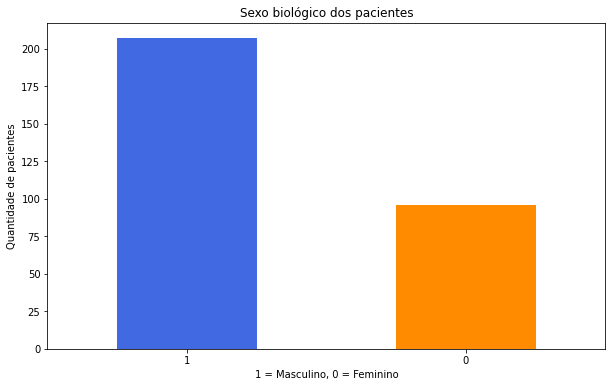

In [10]:
df['sex'].value_counts().plot(kind='bar', figsize=(10, 6), color=['royalblue', 'darkorange'])

plt.title('Sexo biológico dos pacientes')
plt.xlabel('1 = Masculino, 0 = Feminino')
plt.ylabel('Quantidade de pacientes')
plt.xticks(rotation=0)

## Correlacionando sexo biológico com diagnóstico

Vamos analisar a variável *target* em função de *sex*. Os dados nos mostram que a maioria dos pacientes diagnosticados positivamente pertencem ao sexo feminino em uma proporção de 3/4 das ocorrências. O gráfico abaixo representa a quantidade de pacientes em função de seu diagnóstico. As barras de cor azul representam o diagnóstico entre os pacientes do sexo masculino e as de cor laranja o diagnóstico para o sexo feminino.

In [11]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

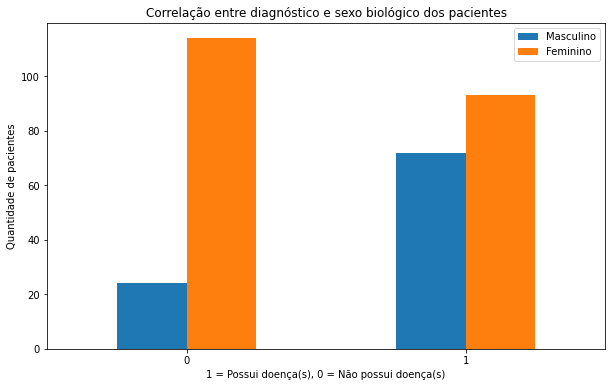

In [12]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10, 6))

plt.title('Correlação entre diagnóstico e sexo biológico dos pacientes')
plt.xlabel('1 = Possui doença(s), 0 = Não possui doença(s)')
plt.ylabel('Quantidade de pacientes')
plt.legend(['Masculino', 'Feminino'])
plt.xticks(rotation=0)

## Analisando a variável idade

Vamos analisar a variável *age* usando medidas de tendência central e visualizando a distribuição em histograma. A partir dos dados abaixo, observamos que tanto a média como a mediana de idades se equivalem a 55 anos. Também observamos que o paciente mais novo e o mais velho possuem, respectivamente, 29 anos e 77 anos. Com relação ao histograma de idades, é possível notar uma distribuição normal dos nossos dados, cujo pico de valores encontra-se na faixa entre os 50 e 70 anos de idade.

In [13]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Text(0, 0.5, 'Frequência')

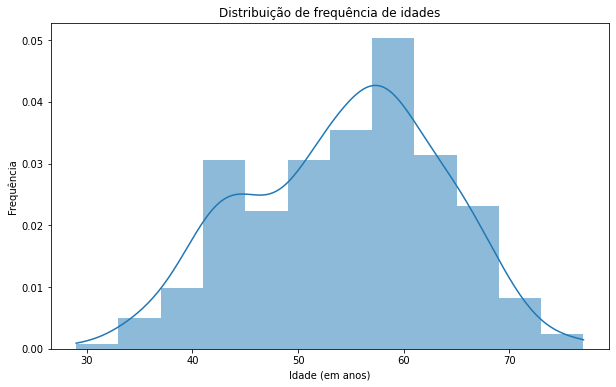

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, stat="density", linewidth=0)

plt.title('Distribuição de frequência de idades')
plt.xlabel('Idade (em anos)')
plt.ylabel('Frequência')

## Correlacionando idade do paciente com frequência cardíaca máxima alcançada

Vamos entender como a idade dos pacientes se relacionam com a sua frequência cardíaca máxima alcançada a partir de um gráfico de dispersão. Neste gráfico, a frequência cardíaca máxima alcançada está em função da idade do paciente. A cor azul indica que o paciente possui doenças cardíacas, enquanto a cor laranja representa a ausência de doença.
   Embora os dados estejam relativamente dispersos, é possível identificar uma correlação negativa entre nossos dados. Logo, podemos concluir que quanto maior a idade do paciente, menor é a frequência cardíaca máxima alcançada.

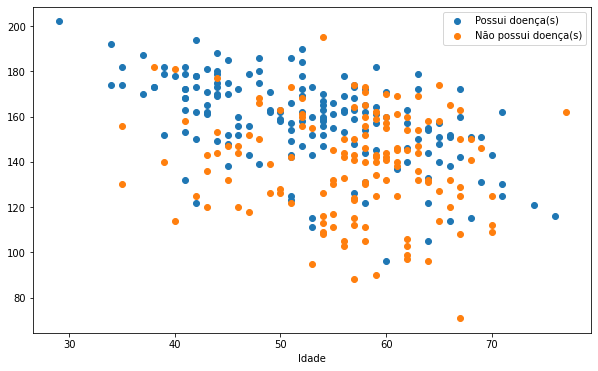

In [23]:
positive_target = df['target'] == 1
negative_target = df['target'] == 0

plt.figure(figsize=(10, 6))
plt.scatter(df.age[positive_target], df.thalach[positive_target])
plt.scatter(df.age[negative_target], df.thalach[negative_target])

plt.xlabel('Idade')
plt.legend(['Possui doença(s)', 'Não possui doença(s)'])

## Correlacionando grau de dor no peito com diagnóstico do paciente

Abaixo foi feita uma correlação entre o grau de dor no peito com o diagnóstico do paciente e o que se pode observar é que a maioria dos pacientes que possui diagnóstico negativo possuem Angina Típica - nome dado a dor no peito causada pela redução do fluxo sanguíneo para o coração. Agora os pacientes que possuem diagnóstico positivo para doença(s) cardíacas em sua maioria apresentam grau de Dor Não Anginal. O gráfico abaixo mostra a proeminência de diagnósticos para cada grau de dor peitoral.

In [ ]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

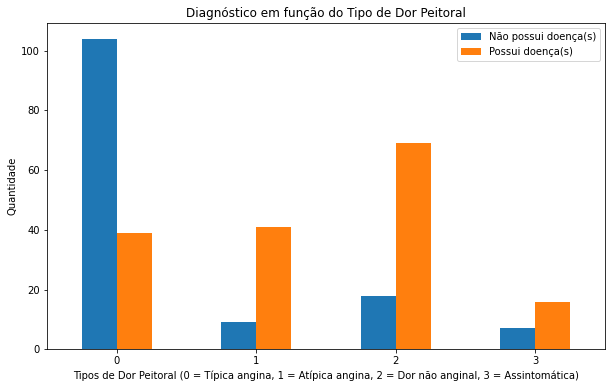

In [24]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10, 6))

plt.title('Diagnóstico em função do Tipo de Dor Peitoral')
plt.legend(['Não possui doença(s)', 'Possui doença(s)'])
plt.xlabel('Tipos de Dor Peitoral (0 = Típica angina, 1 = Atípica angina, 2 = Dor não anginal, 3 = Assintomática)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

## Matriz de correlação

Por fim foi feito uma matriz de correlação, usando como parâmetro o Coeficiente de Pearson. Podemos notar correlações positivas entre *cp* (Dor no Peito), *thalach* (Frequência Cardiáca Máxima Alcançada) e nossa variável *target* (Diagnóstico do paciente)

<AxesSubplot:>

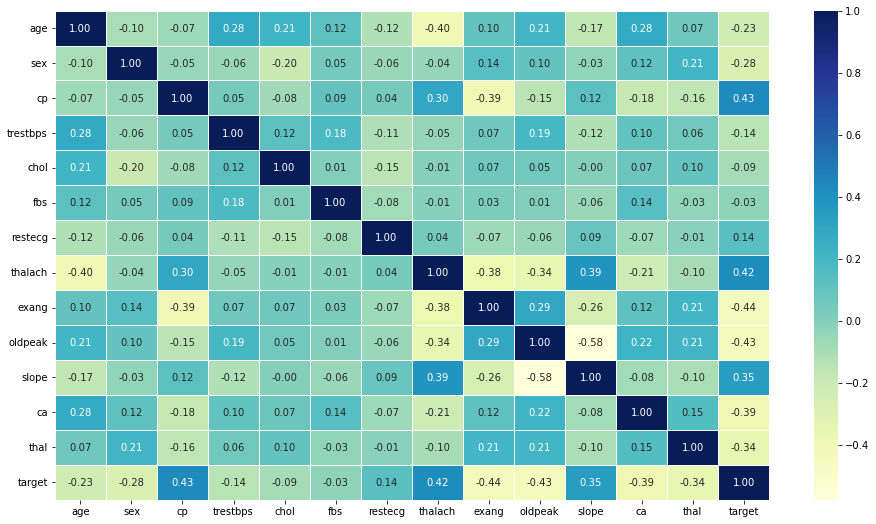

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt=".2f", cmap='YlGnBu')

# Implementando Modelos Preditivos

In [ ]:
x = df.drop('target', axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [1]:
model = KNeighborsClassifier()

model.fit(x_train, y_train)
printf(f'Acurácia inicial = {model.score(x_test, y_test) * 100}')

NameError: ignored

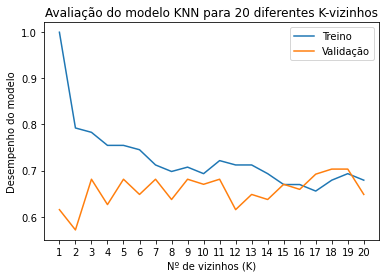

In [ ]:
num_neightbors = list(range(1, 21))

train_score = []
test_score = []

for i in num_neightbors:
    model.set_params(n_neighbors=i)
    model.fit(x_train, y_train)
    
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))

plt.title("Avaliação do modelo KNN para 20 diferentes K-vizinhos")
plt.plot(num_neightbors, train_score, label="Treino")
plt.plot(num_neightbors, test_score, label="Validação")
plt.xticks(num_neightbors)
plt.xlabel("Nº de vizinhos (K)")
plt.ylabel("Desempenho do modelo")
plt.legend()


In [ ]:
model = RandomForestClassifier()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8461538461538461

In [ ]:
grid_rand_forest = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

gscv_rand_for = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=grid_rand_forest
)

gscv_rand_for.fit(x_train, y_train)
gscv_rand_for.best_params_

{'n_estimators': 160,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
gscv_rand_for.score(x_test, y_test)

In [ ]:
model = LogisticRegression()

model.fit(x_train, y_train)
model.score(x_test, y_test)

/home/edison/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8461538461538461